# Question: In the game Exploding Kittens, what is the probability that the first card drawn is a Attack Card? Assume that no other card has been drawn and the deck has been properly shuffled.

I plan to conduct an prospective, observational study. The sample space is a standard deck of cards in a Exploding Kitten game that contains 56 cards. One trial in this simulation would be drawing a random card from the top of the deck, and the measured outcome would be the card drawn.

In [7]:
import random as rd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [17]:
df = pd.read_csv("CardDistribution.csv")

In [40]:
total = df["Number"].sum()
count = df.loc[df["Card"] == "Attack", "Number"].values[0]
tProb = count / total
print("The theoretical probability of drawing an attack card is:", tProb)

The theoretical probability of drawing an attack card is: 0.07142857142857142


In [44]:
print("Deck DataFrame:\n", df)

# Expand the deck based on counts
deck = []
for _, row in df.iterrows():
    deck.extend([row["Card"]] * row["Number"])

# Run 100 trials (draw with replacement)
trials = [rd.choice(deck) for _ in range(100)]

# Count frequency of each card
trial_counts = Counter(trials)
# Display results
print("Card draw frequencies after 100 trials:")
for card, freq in trial_counts.items():
    print(f"{card}: {freq}")

frequency1 = trial_counts["Attack"]
frequency = int(frequency1)
eProb = frequency / total
print("Empirical Probability of drawing an attack card:", eProb)

Deck DataFrame:
                    Card  Number  ID
0                Attack       4   1
1             Beard Cat       4   2
2               Tacocat       4   3
3   Rainbow-Ralping Cat       4   4
4      Hairy Potato Cat       4   5
5           Cattermelon       4   6
6                Defuse       6   7
7     Exploding Kittens       4   8
8                 Favor       4   9
9                  Nope       5  10
10       See The Future       5  11
11              Shuffle       4  12
12                 Skip       4  13
Card draw frequencies after 100 trials:
Rainbow-Ralping Cat: 6
Favor: 12
Cattermelon: 6
Beard Cat: 11
Tacocat: 11
Attack: 6
Defuse: 9
Shuffle: 6
Skip: 4
Exploding Kittens: 6
See The Future: 11
Hairy Potato Cat: 5
Nope: 7
Empirical Probability of drawing an attack card: 0.10714285714285714


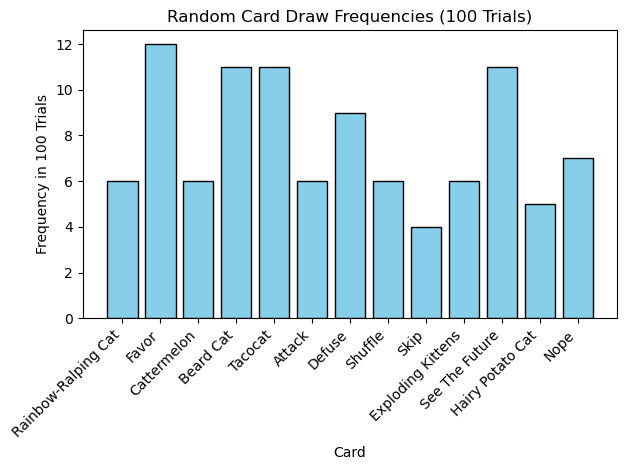

In [46]:
plt.bar(trial_counts.keys(), trial_counts.values(), color='skyblue', edgecolor='black')

# Rotate labels and align them
plt.xticks(rotation=45, ha='right')  # 'right', 'left', or 'center'

plt.xlabel("Card")
plt.ylabel("Frequency in 100 Trials")
plt.title("Random Card Draw Frequencies (100 Trials)")
plt.tight_layout()  # Adjust spacing to prevent clipping
plt.show()

# Answer: The theoretical probability of the top card drawn being an attack card is 7.1428%, while the empirical probability of the top card being an attack card is 10.7142%, which was collected using a 100 random trials.